In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('feature_enginnering.parquet')

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Customer_City', 'ProductName', 'Category',
       'SubCategory', 'UnitPrice', 'CostPrice', 'Date', 'Quantity', 'Discount',
       'PaymentMethod', 'StoreName', 'Store_City', 'Region', 'Revenue',
       'Profit', 'ProfitMargin', 'Year', 'Month', 'Day', 'Weekday', 'Quarter',
       'PriceRange', 'DiscountLevel', 'TotalCost'],
      dtype='object')

In [5]:
df.head()

,CustomerID,Gender,Customer_City,ProductName,Category,SubCategory,UnitPrice,CostPrice,Date,Quantity,...,Profit,ProfitMargin,Year,Month,Day,Weekday,Quarter,PriceRange,DiscountLevel,TotalCost
0,C001,M,Osborneport,Like Camera,Electronics,Camera,1673.69,1323.38,2025-06-28,2,...,700.62,20.930399,2025,6,28,Saturday,2,Premium,Low,2646.76
1,C001,M,Osborneport,Like Camera,Electronics,Camera,1673.69,1323.38,2023-12-21,3,...,1050.93,22.031999,2023,12,21,Thursday,4,Premium,Low,3970.14
2,C001,M,Osborneport,Audience Television,Electronics,Television,818.76,527.62,2025-06-28,3,...,873.42,37.430158,2025,6,28,Saturday,2,Premium,Low,1582.86
3,C001,M,Osborneport,Audience Television,Electronics,Television,818.76,527.62,2024-04-21,3,...,873.42,37.430158,2024,4,21,Sunday,2,Premium,Low,1582.86
4,C001,M,Osborneport,Here Footwear,Fashion,Footwear,337.63,169.03,2025-03-02,1,...,168.60,55.484801,2025,3,2,Sunday,1,High,Medium,169.03


## For Categorical Data

In [9]:


# All categorical columns
cat_cols = [
     'Gender', 'ProductName', 'Category',
    'SubCategory', 'PaymentMethod', 'StoreName', 'Store_City', 'Region',
    'PriceRange', 'DiscountLevel'
]

for col in cat_cols:
    print("\n====================================================")
    print(f"📌 Feature: {col}")
    print("====================================================")

    # Frequency table
    # freq = df[col].value_counts()

    # Percentage distribution
    pct = df[col].value_counts(normalize=True) * 100

    # Mode
    mode_val = df[col].mode()[0]

    # Unique count
    unique_count = df[col].nunique()

    # Bullet-point style results
    print(f"• Unique Count: {unique_count}")
    print(f"• Mode (Most Common): {mode_val}\n")
    # print(f"• Frequency Table:\n{freq.to_string()}\n")
    print(f"• Percentage Distribution (%):\n{pct.round(2).to_string()}")



📌 Feature: Gender
• Unique Count: 2
• Mode (Most Common): M

• Percentage Distribution (%):
Gender
M    56.2
F    43.8

📌 Feature: ProductName
• Unique Count: 50
• Mode (Most Common): And Footwear

• Percentage Distribution (%):
ProductName
And Footwear             2.30
Book Television          2.30
World Watches            2.30
Foot Snacks              2.24
Road Clothing            2.22
Set Dairy                2.22
How Vegetables           2.14
Firm Dairy               2.14
Possible Watches         2.14
Everything Laptop        2.14
Step Smartphone          2.14
Traditional Laptop       2.12
Whether Bags             2.10
Audience Television      2.10
Us Snacks                2.10
Deal Smartphone          2.10
Add Clothing             2.08
Behavior Dairy           2.08
Nor Bags                 2.08
Maybe Footwear           2.08
National Watches         2.06
Beat Accessories         2.06
Church Clothing          2.06
Like Camera              2.04
Present Television       2.02
Him Smar

## NUMERICAL FEATURES ANALYSIS

## A. Basic Descriptive Statistics


In [10]:
num_cols = ['UnitPrice','CostPrice','Quantity','Discount','Revenue',
            'Profit','ProfitMargin','TotalCost']

df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
UnitPrice,5000.0,1036.606538,589.316649,25.570000,428.050000,1193.090000,1487.410000,1952.650000
CostPrice,5000.0,701.998512,426.686344,15.280000,258.720000,794.800000,1004.090000,1451.270000
Quantity,5000.0,2.989800,1.409430,1.000000,2.000000,3.000000,4.000000,5.000000
Discount,5000.0,0.075880,0.056497,0.000000,0.050000,0.100000,0.150000,0.150000
Revenue,5000.0,2860.380629,2265.958863,21.734500,1043.154000,2156.120000,4451.305500,9763.250000
Profit,5000.0,999.916648,835.309234,6.520000,366.800000,808.710000,1455.700000,4372.600000
ProfitMargin,5000.0,36.412669,10.259721,20.383136,26.935506,35.209872,45.082439,58.748613
TotalCost,5000.0,2095.117696,1717.600926,15.280000,738.210000,1582.860000,3191.760000,7256.350000


## B. Distribution Shape

## For each numeric feature, check:

### 1. Histogram + KDE

Shows whether data is:

Normal

Right-skewed

Left-skewed

Multimodal (multiple peaks)

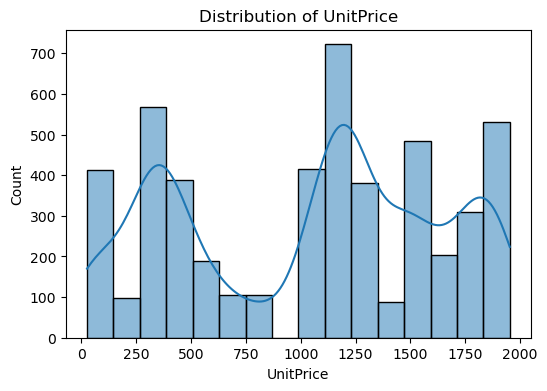

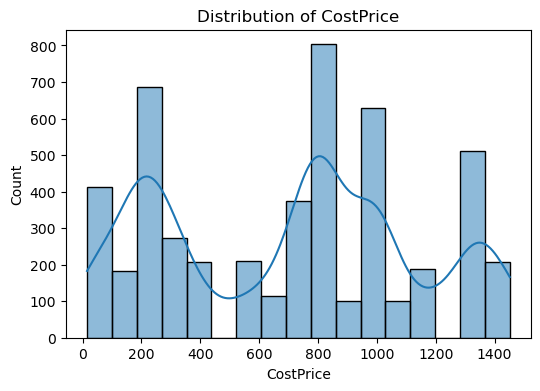

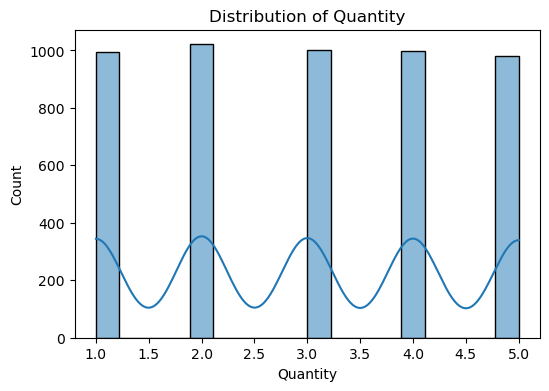

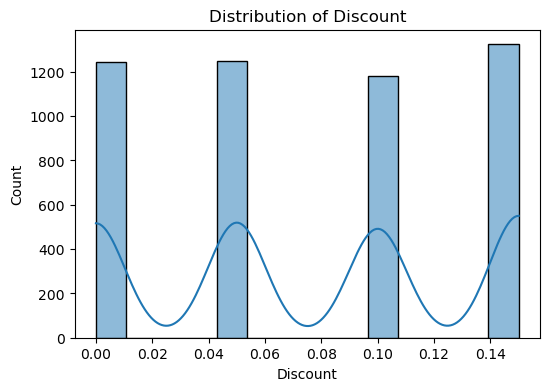

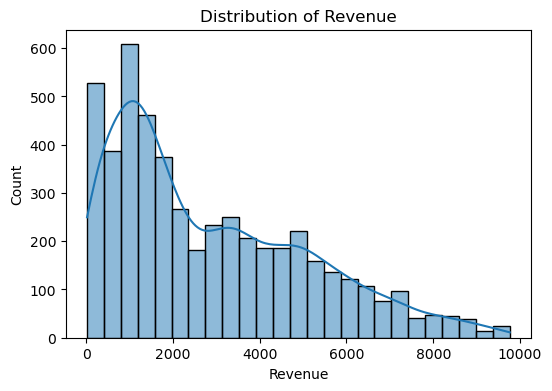

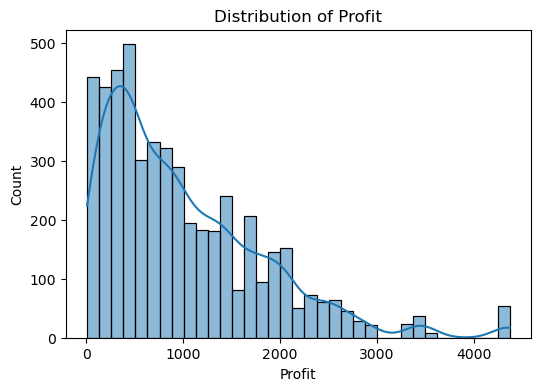

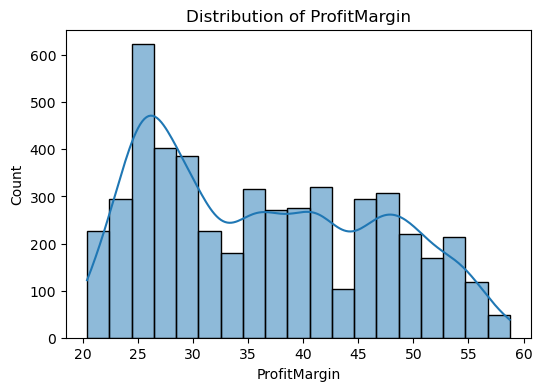

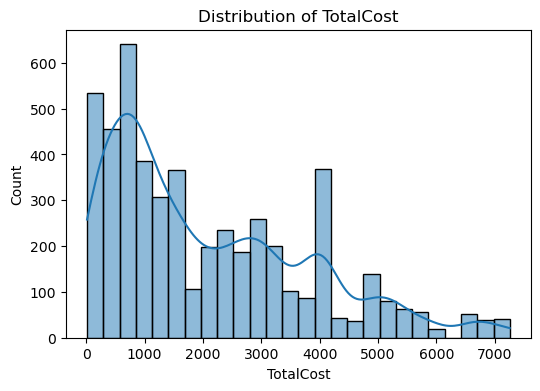

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### 2. Skewness

In [16]:
df[num_cols].skew()


UnitPrice      -0.185608
CostPrice       0.023655
Quantity        0.012071
Discount       -0.009991
Revenue         0.812938
Profit          1.316959
ProfitMargin    0.312213
TotalCost       0.893826
dtype: float64

### 3. Kurtosis

.> 3 → heavy tails (leptokurtic)

< 3 → light tails (platykurtic)

= 3 → normal

In [17]:
df[num_cols].kurt()


UnitPrice      -1.262721
CostPrice      -1.154297
Quantity       -1.293056
Discount       -1.387264
Revenue        -0.198027
Profit          2.027580
ProfitMargin   -1.128587
TotalCost       0.033431
dtype: float64

## Time Base Analysis


In [28]:
## Monthly sales

sales_month = df.groupby('Month')['Revenue'].sum().reset_index()

print(sales_month)


    Month       Revenue
0       1  1.212347e+06
1       2  1.058135e+06
2       3  1.139712e+06
3       4  1.298812e+06
4       5  1.198751e+06
5       6  1.314572e+06
6       7  1.165776e+06
7       8  1.105883e+06
8       9  1.116470e+06
9      10  1.223012e+06
10     11  1.151862e+06
11     12  1.316573e+06


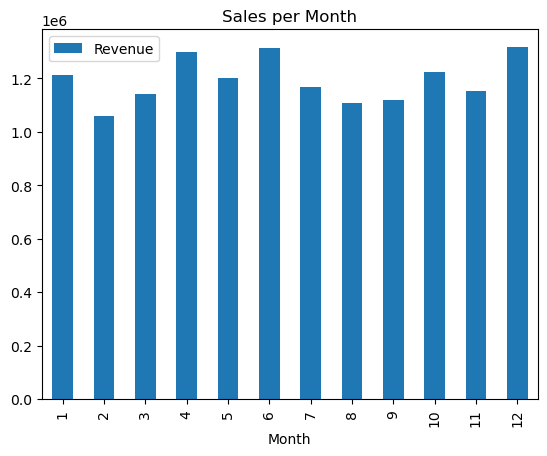

In [29]:
sales_month.plot(x='Month', y='Revenue', kind='bar')
plt.title("Sales per Month")
plt.show()


In [31]:
## Highest and lowest Monthly sales

monthly_sales = df.groupby('Month')['Revenue'].sum()

highest_month = monthly_sales.idxmax()
lowest_month = monthly_sales.idxmin()

print("Highest Sales Month:", highest_month)
print("Lowest Sales Month:", lowest_month)


Highest Sales Month: 12
Lowest Sales Month: 2


### Is the average revenue significantly different from ₹5000?
### Is there a relationship between Discount and Revenue?
### Are sales higher on weekends?

In [32]:
import numpy as np
import scipy.stats as st

mean = df['Revenue'].mean()
sem = st.sem(df['Revenue'])
ci = st.t.interval(0.95, len(df['Revenue'])-1, loc=mean, scale=sem)
print("95% Confidence Interval:", ci)


95% Confidence Interval: (2797.5573976477717, 2923.203861352228)


## One-Sample t-test

Used when you want to test:

“Is the average value significantly different from a target value?”

Example:
Is the average UnitPrice significantly different from ₹250?

In [36]:
from scipy.stats import ttest_1samp

test_value = 2500
t_stat, p_value = ttest_1samp(df['UnitPrice'], test_value)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -175.58903897176853
p-value: 0.0


## Two-Sample t-test

Use this when you want to compare two groups.

Examples:

Is Male average revenue different from Female average revenue?

Is UPI payment revenue different from Credit Card revenue?

In [38]:
from scipy.stats import ttest_ind

group1 = df[df['Gender']=='M']['Revenue']
group2 = df[df['Gender']=='F']['Revenue']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 0.4150330347812059
p-value: 0.6781365071213334


## p < 0.05 → significant difference between groups
## p ≥ 0.05 → no difference

## Simple Correlation Test

Used to check if two numerical variables are related.

Example:
Does Discount affect Revenue?

In [39]:
df[['Discount', 'Revenue']].corr()


,Discount,Revenue
Discount,1.00000,-0.07823
Revenue,-0.07823,1.00000


## Chi-Square Test for Categorical Variables 
Used when both variables are categorical.

Example:

Is Payment Method related to Region?

Is Gender related to Category purchased?

In [40]:
import scipy.stats as st

table = pd.crosstab(df['PaymentMethod'], df['Region'])
chi2, p, dof, expected = st.chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 7.131187307381361
p-value: 0.6234629863556271


p < 0.05 → variables are dependent

p ≥ 0.05 → no relationship